# Понижение размерности

# Содержание работы


In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Сгенерируйте синтетический двумерный датасет с высокой степенью корреляции между признаками.

In [361]:
n_samples = 100
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)

X = np.column_stack((x, y))

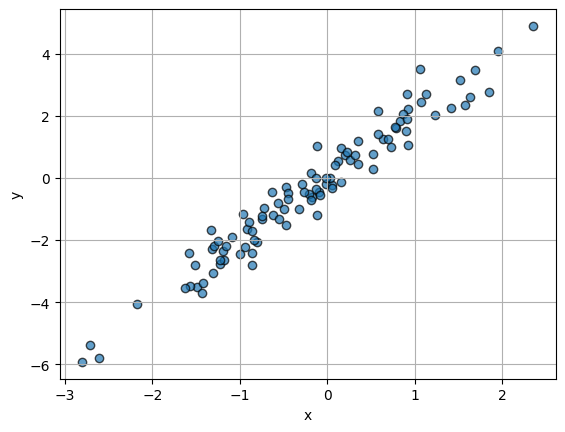

In [362]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, edgecolor='k')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

### 2. Понизьте размерность датасета до одной при помощи метода PCA и визуализируйте его до и после.


In [363]:
from sklearn.decomposition import PCA


pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

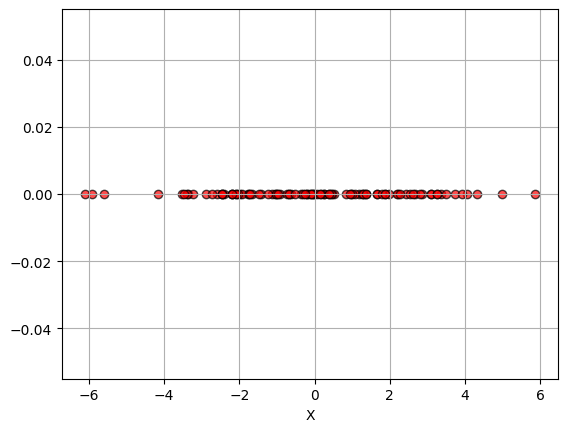

In [364]:
plt.scatter(X_pca, np.zeros_like(X_pca), alpha=0.7, c="r", edgecolor='k')
plt.xlabel("X")
plt.grid(True)
plt.show()

In [365]:
print(f"Главная компонента (направление): {pca.components_}")
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_}")

Главная компонента (направление): [[0.43046442 0.90260755]]
Объясненная дисперсия: [0.99223268]


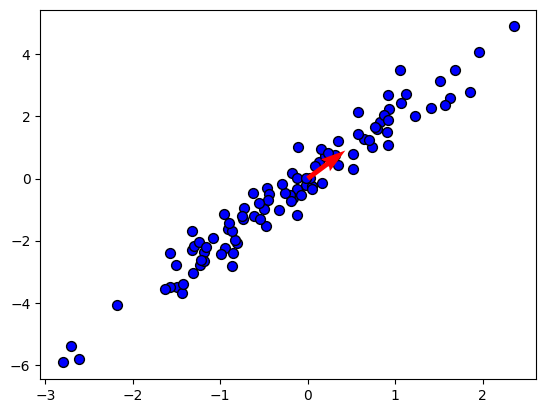

In [366]:
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=50)
pc1_direction = pca.components_[0]
plt.quiver(0, 0, pc1_direction[0], pc1_direction[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)


In [367]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

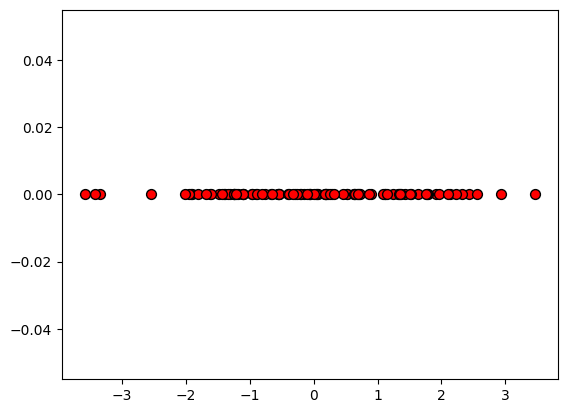

In [368]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)

### 3. Примените метод главных компонент на более многомерных данных. Визуализируйте две главные компоненты.


In [369]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
X.shape, y.shape

((569, 30), (569,))

In [370]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Уменьшаем до 2 компонент
X_pca = pca.fit_transform(X_scaled)

<Axes: >

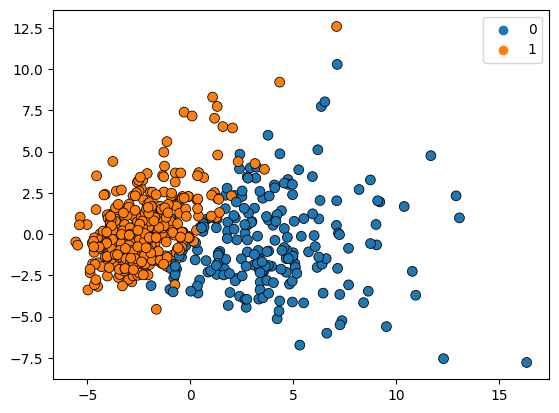

In [371]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, edgecolor='k', s=50)

In [372]:
print(f"Главная компонента (направление): {pca.components_}")

Главная компонента (направление): [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [373]:
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182]
Суммарная объясненная дисперсия: 0.63


### 4. Выберите оптимальное количество главных компонент по методу локтя.


In [374]:
n_components_range = range(1, 31)
explained_variance = []

In [375]:
for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance.append(sum(pca.explained_variance_ratio_))

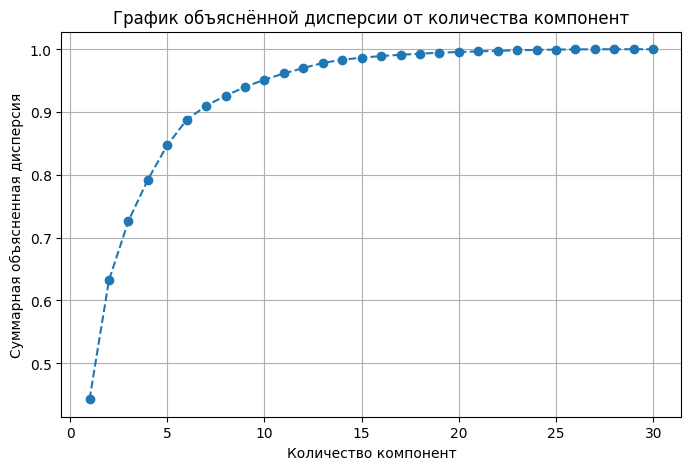

In [376]:
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, explained_variance, marker='o', linestyle='--')
plt.xlabel('Количество компонент')
plt.ylabel('Суммарная объясненная дисперсия')
plt.title('График объяснённой дисперсии от количества компонент')
plt.grid(True)
plt.show()

In [377]:
pca = PCA(n_components=7)  # Уменьшаем до 7 компонент
X_pca = pca.fit_transform(X_scaled)

# Объясненная дисперсия
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
Суммарная объясненная дисперсия: 0.91


<Axes: >

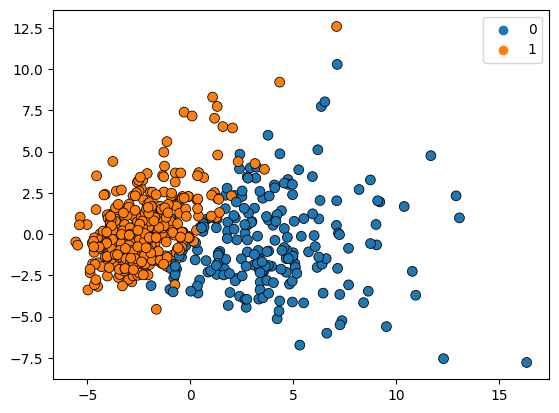

In [378]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, edgecolor='k', s=50)

### 5. Сгенерируйте двумерный датасет для классификации и примените на нем метод линейного дискриминантного анализа.


In [379]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

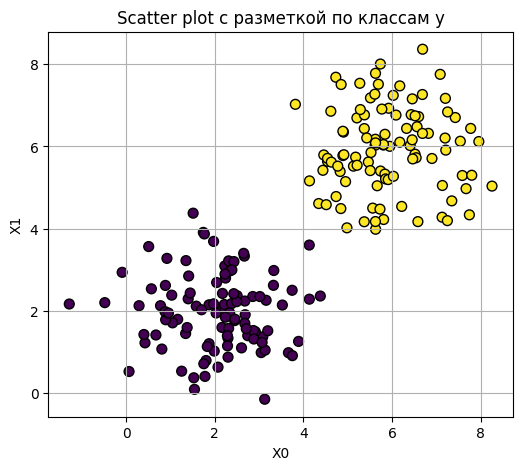

In [380]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel("X0")
plt.ylabel("X1")
plt.title("Scatter plot с разметкой по классам y")
plt.grid(True)
plt.show()

In [381]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

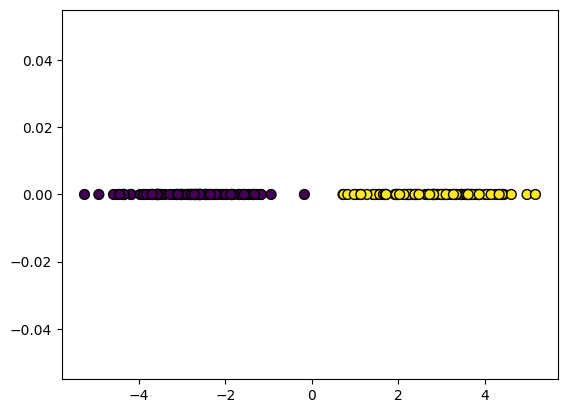

In [382]:
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, edgecolor='k', s=50)

In [383]:
print(f"Коэффициенты LDA: {lda.coef_}")

Коэффициенты LDA: [[8.26183071 9.31666947]]


In [384]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

[[31  0]
 [ 0 29]]
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        31
         1.0      1.000     1.000     1.000        29

    accuracy                          1.000        60
   macro avg      1.000     1.000     1.000        60
weighted avg      1.000     1.000     1.000        60



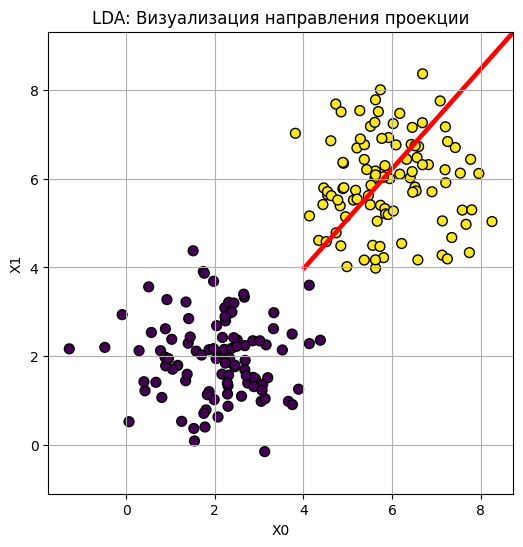

In [385]:
coeffs = lda.coef_[0]

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.quiver(X[:, 0].mean(), X[:, 1].mean(), coeffs[0], coeffs[1],
           color='red', scale=10, width=0.01)

plt.xlabel("X0")
plt.ylabel("X1")
plt.title("LDA: Визуализация направления проекции")
plt.grid(True)
plt.axis('equal')
plt.show()

In [386]:
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=200, random_state=170, centers=2)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation) 

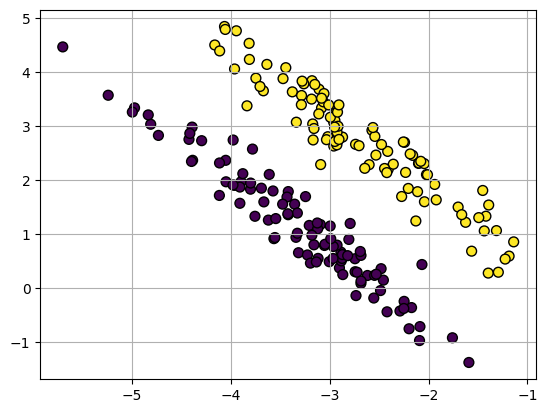

In [387]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.grid(True)

In [388]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

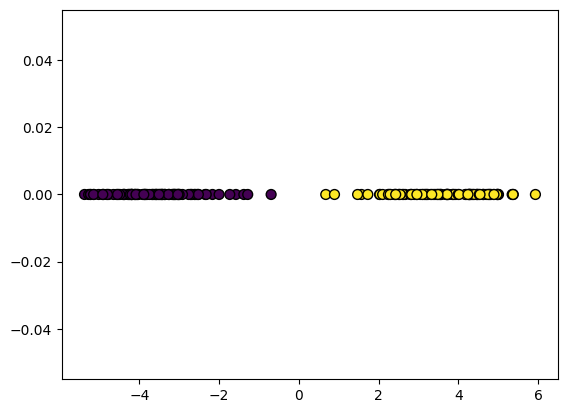

In [389]:
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, edgecolor='k', s=50)

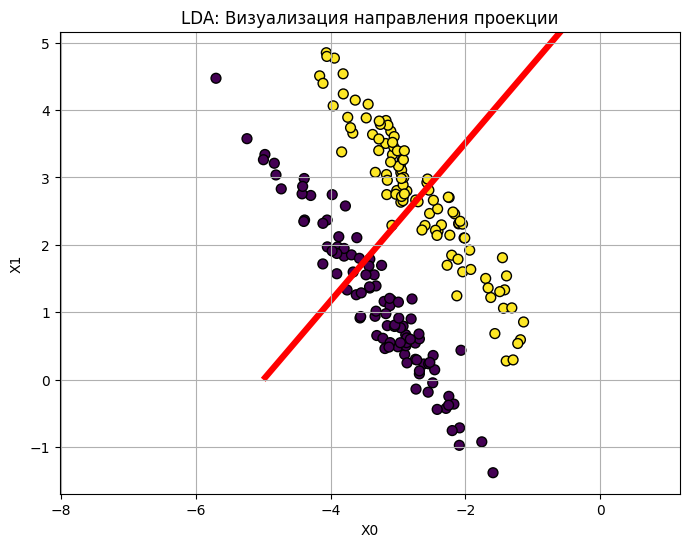

In [390]:
coeffs = lda.coef_[0]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.quiver(-5, 0, coeffs[0], coeffs[1],
           color='red', scale=10, width=0.01)

plt.xlabel("X0")
plt.ylabel("X1")
plt.title("LDA: Визуализация направления проекции")
plt.grid(True)
plt.axis('equal')
plt.show()

In [391]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled, y)

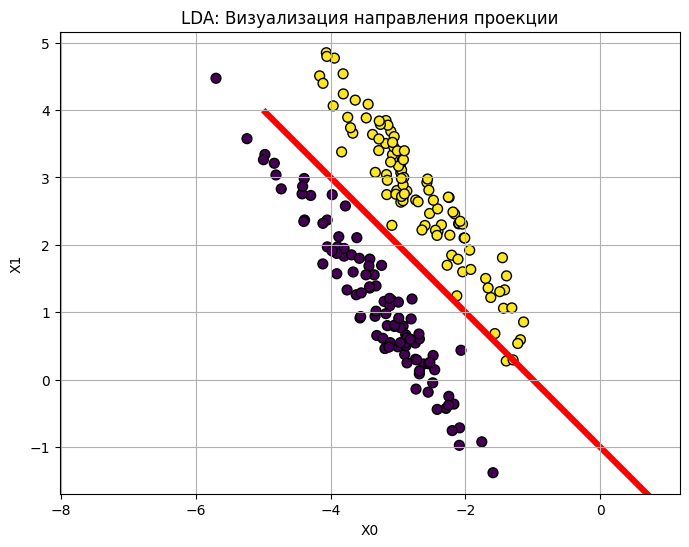

In [392]:
pc1_direction = pca.components_[0]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.quiver(-5, 4, pc1_direction[0], pc1_direction[1],
           color='red', scale=1, width=0.01)

plt.xlabel("X0")
plt.ylabel("X1")
plt.title("LDA: Визуализация направления проекции")
plt.grid(True)
plt.axis('equal')
plt.show()

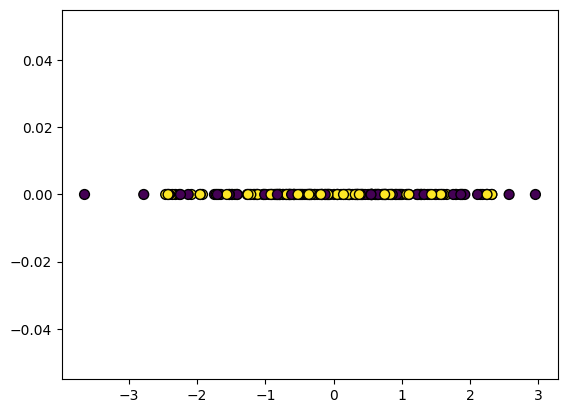

In [393]:
plt.scatter(X_pca, np.zeros_like(X_pca), c=y, edgecolor='k', s=50)

### 6. Сгенерируйте двумерный датасет для классификации и примените на нем метод понижения размерности t-SNE.


In [394]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=1, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

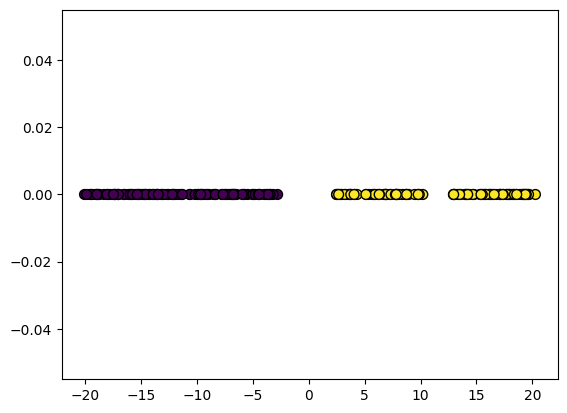

In [395]:
plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, edgecolor='k', s=50)

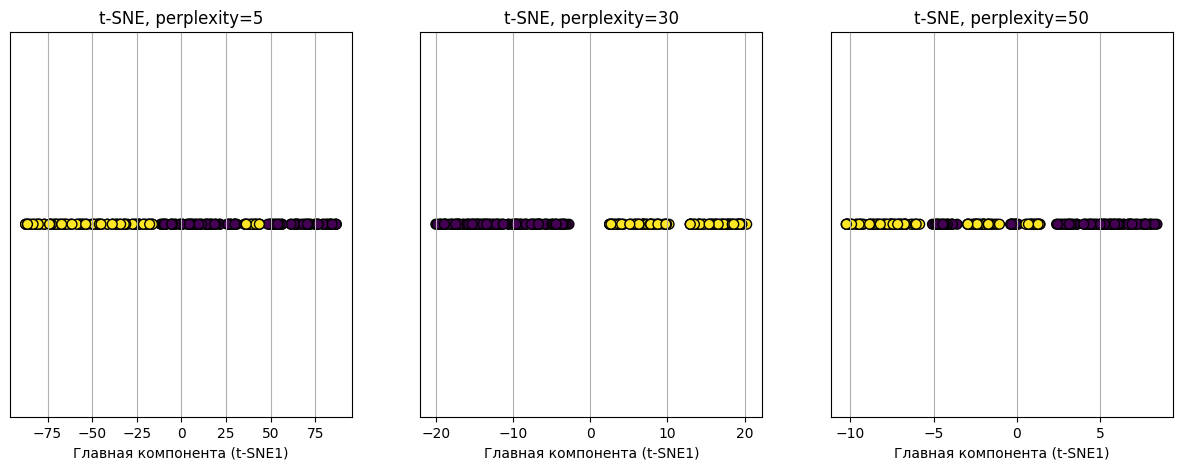

In [396]:
perplexity_values = [5, 30, 50]
plt.figure(figsize=(15, 5))

for i, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=1, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f't-SNE, perplexity={perplexity}')
    plt.xlabel('Главная компонента (t-SNE1)')
    plt.yticks([])
    plt.grid(True)

### 7. Сгенерируйте линейно неразделимый двумерный датасет для классификации и опробуйте на нем метод KernelPCA с различными ядрами.


In [397]:
from sklearn.datasets import make_circles


X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

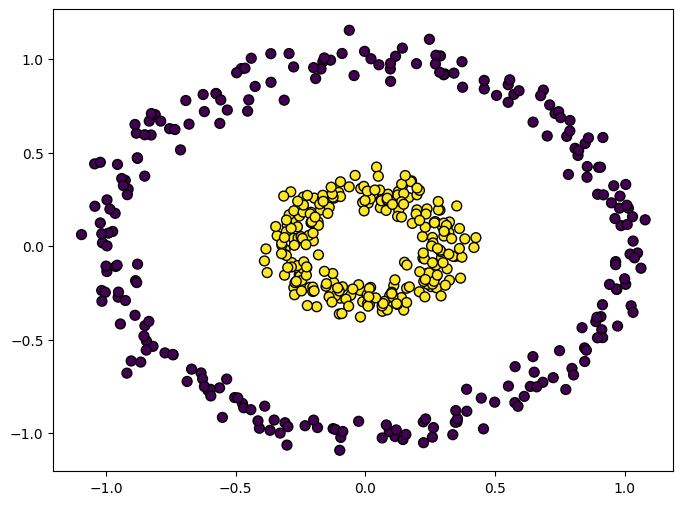

In [398]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)

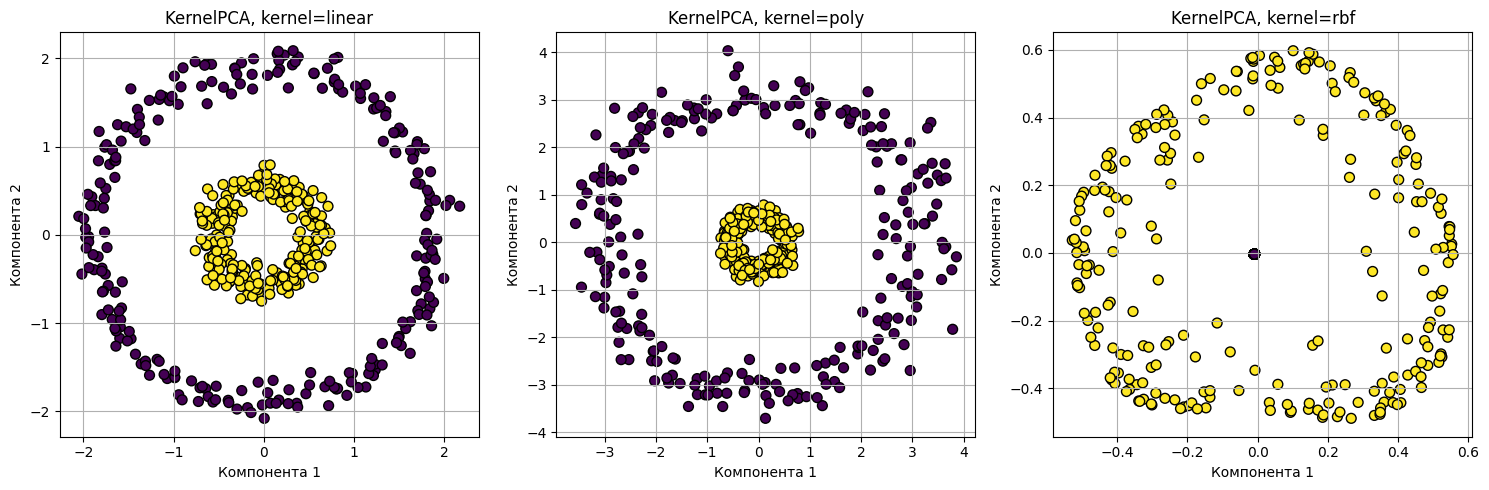

In [399]:
from sklearn.decomposition import KernelPCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(15, 5))
kernels = ['linear', 'poly', 'rbf']
for i, kernel in enumerate(kernels):
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=10 if kernel == 'rbf' else None)
    X_kpca = kpca.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f'KernelPCA, kernel={kernel}')
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')
    plt.grid(True)

plt.tight_layout()
plt.show()

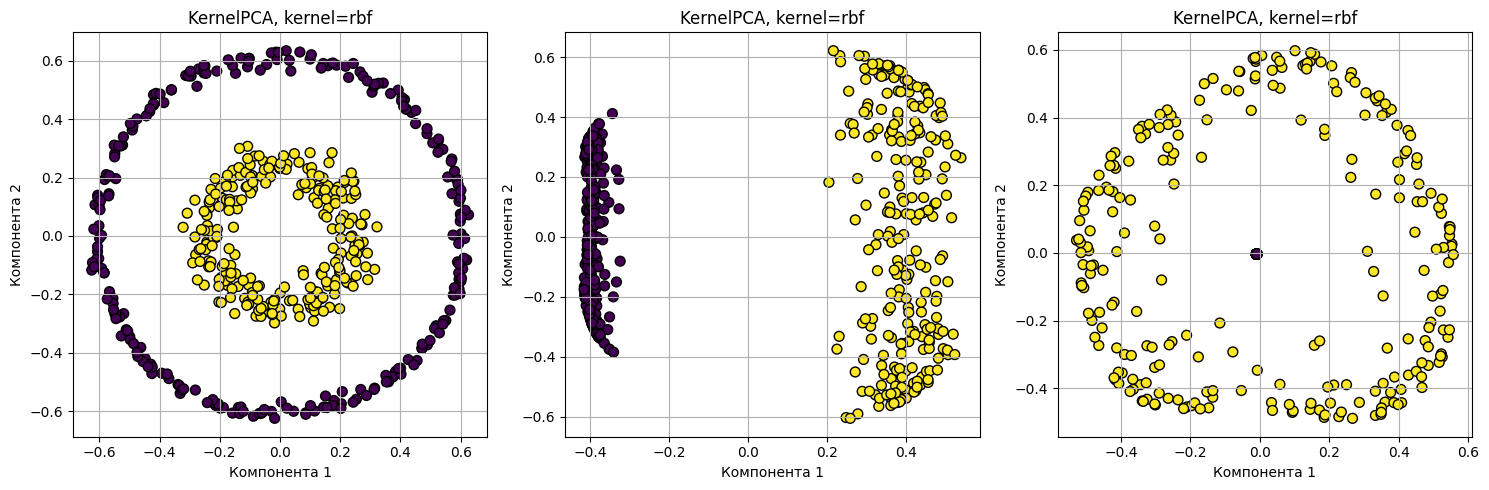

In [400]:
from sklearn.decomposition import KernelPCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(15, 5))
gamma_values = [0.1, 1, 10]
for i, gamma in enumerate(gamma_values):
    kpca = KernelPCA(n_components=2, kernel="rbf", gamma=gamma)
    X_kpca = kpca.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f'KernelPCA, kernel={kernel}')
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Задание для самостоятельной работы

### 1. Попробуйте изменить уровень шума в данных (например, увеличить или уменьшить шум в y) и посмотрите, как это влияет на результат PCA.

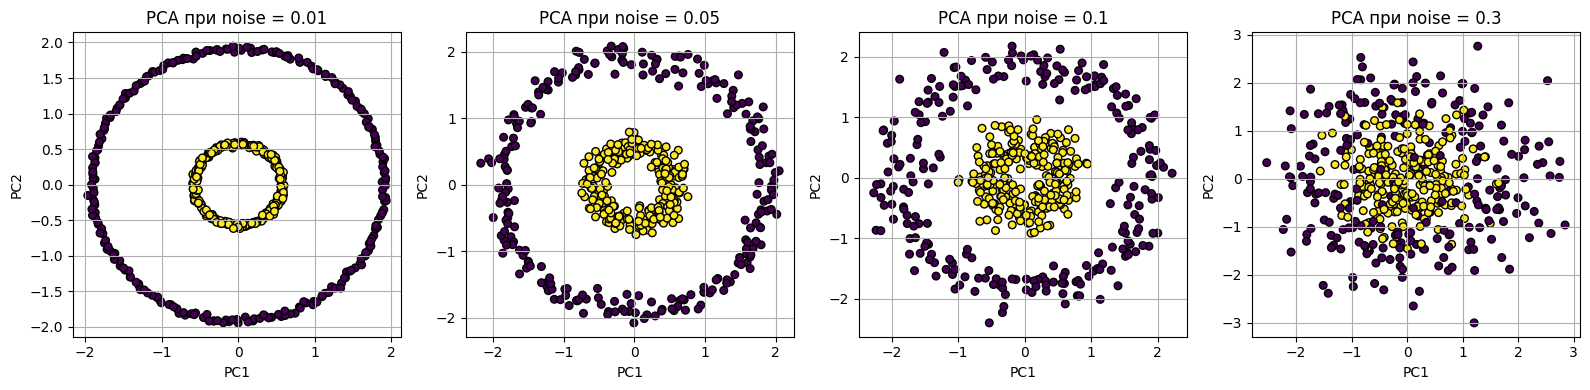

In [401]:
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

noise_levels = [0.01, 0.05, 0.1, 0.3]

plt.figure(figsize=(16, 4))

for i, noise in enumerate(noise_levels):
    X, y = make_circles(n_samples=500, factor=0.3, noise=noise, random_state=42)

    X_scaled = StandardScaler().fit_transform(X)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.subplot(1, len(noise_levels), i + 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=30, edgecolor='k')
    plt.title(f"PCA при noise = {noise}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)

plt.tight_layout()
plt.show()


### 2. Добавьте третий признак, который также коррелирует с первыми двумя, и примените PCA с n_components=2.

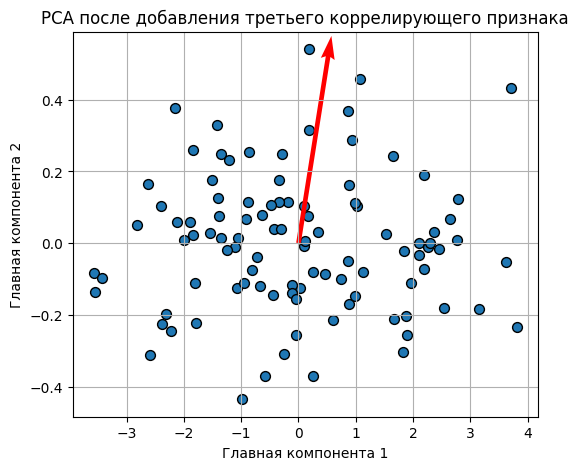

In [402]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


n_samples = 100
x = np.random.normal(0, 1, n_samples)
y = 2 * x + np.random.normal(0, 0.5, n_samples)
z = x + y + np.random.normal(0, 0.2, n_samples)

X = np.column_stack((x, y, z))

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pc1_direction = pca.components_[0]

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='k', s=50)
plt.quiver(0, 0, pc1_direction[0], pc1_direction[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.title("PCA после добавления третьего коррелирующего признака")
plt.grid(True)
plt.show()

### 3. Попробуйте изменить расположение классов (например, сделать их ближе друг к другу) и посмотрите, как это влияет на результат LDA.


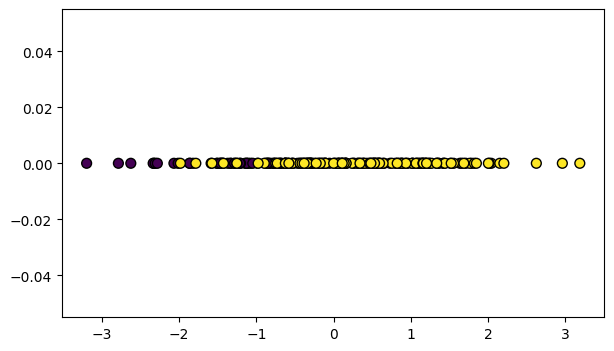

In [403]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(3, 1, n_samples) 
y2 = np.random.normal(3, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(7, 4))
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, edgecolor='k', s=50)

In [404]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

[[24  7]
 [ 9 20]]
              precision    recall  f1-score   support

         0.0      0.727     0.774     0.750        31
         1.0      0.741     0.690     0.714        29

    accuracy                          0.733        60
   macro avg      0.734     0.732     0.732        60
weighted avg      0.734     0.733     0.733        60



Общее качество модели ухудшилось из-за того что начальные данные стали менее раздилимыми

Добавьте третий класс и примените LDA с n_components=2.

### 4. Добавьте третий класс и примените LDA с n_components=2.


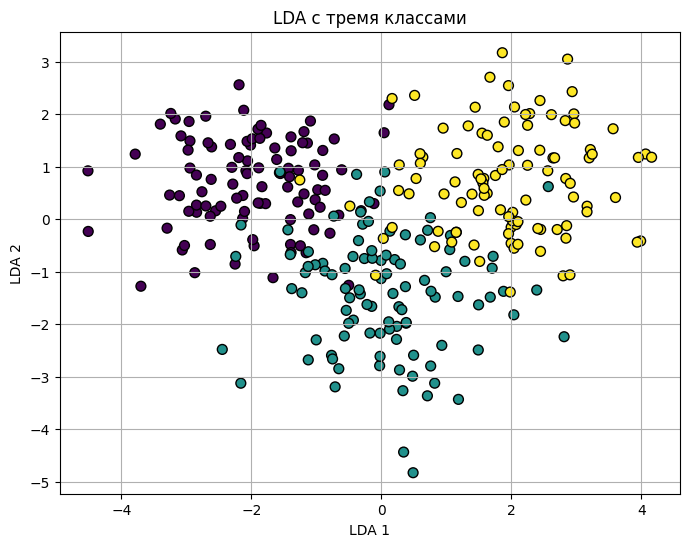

In [405]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import numpy as np

n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)

x2 = np.random.normal(4, 1, n_samples)
y2 = np.random.normal(4, 1, n_samples)

x3 = np.random.normal(6, 1, n_samples)
y3 = np.random.normal(2, 1, n_samples)

X = np.vstack((
    np.column_stack((x1, y1)),
    np.column_stack((x2, y2)),
    np.column_stack((x3, y3))
))

y = np.hstack((
    np.zeros(n_samples),
    np.ones(n_samples),
    np.full(n_samples, 2)
))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.title('LDA с тремя классами')
plt.grid(True)
plt.show()

### 5.  Сравните LDA с PCA на этих же данных. Какой метод лучше разделяет классы?

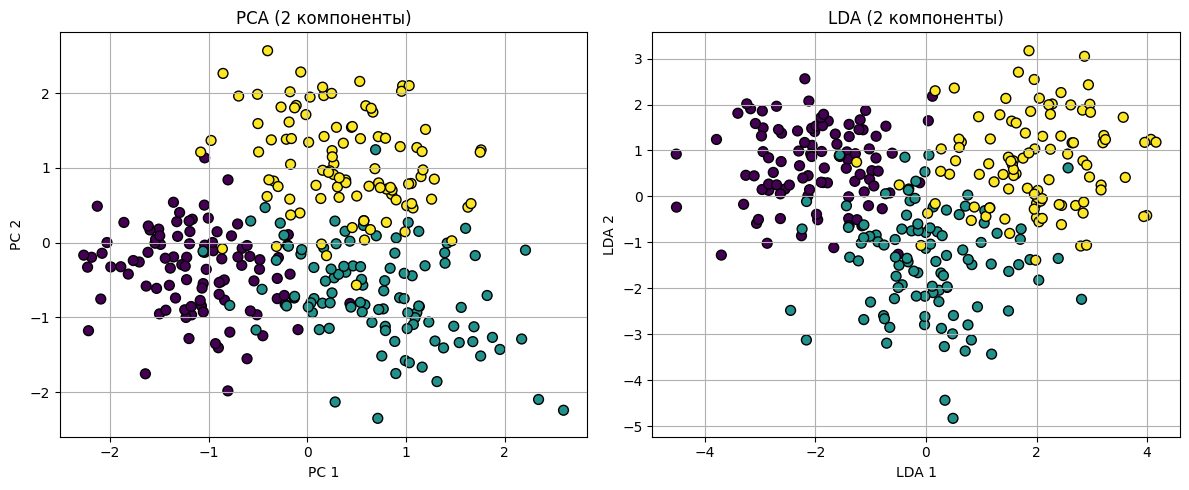

In [406]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA (2 компоненты)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('LDA (2 компоненты)')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.grid(True)

plt.tight_layout()
plt.show()

### 6. Попробуйте изменить параметр degree для полиномиального ядра метода KernelPCA и посмотрите, как это влияет на результат.


In [407]:
from sklearn.datasets import make_circles


X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

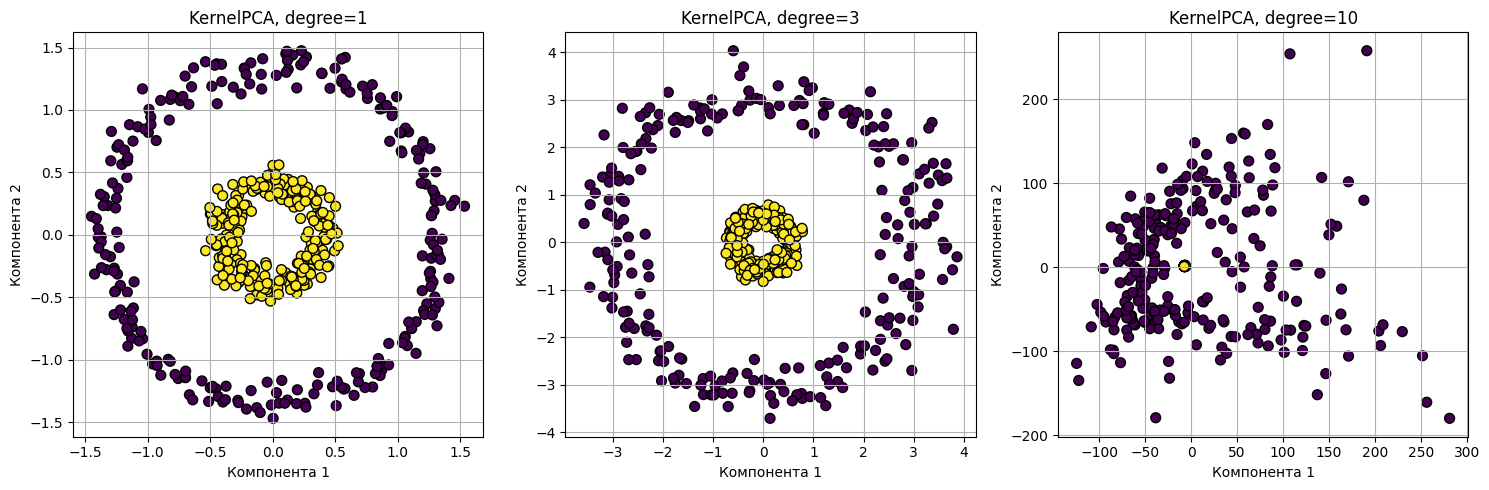

In [408]:
from sklearn.decomposition import KernelPCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(15, 5))
degrees = [1, 3, 10]
for i, degree in enumerate(degrees):
    kpca = KernelPCA(n_components=2, kernel="poly", degree=degree)
    X_kpca = kpca.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f'KernelPCA, degree={degree}')
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')
    plt.grid(True)

plt.tight_layout()
plt.show()

### 7. Примените все три изученных в этой работе метода к датасету для классификации по вашему выбору.


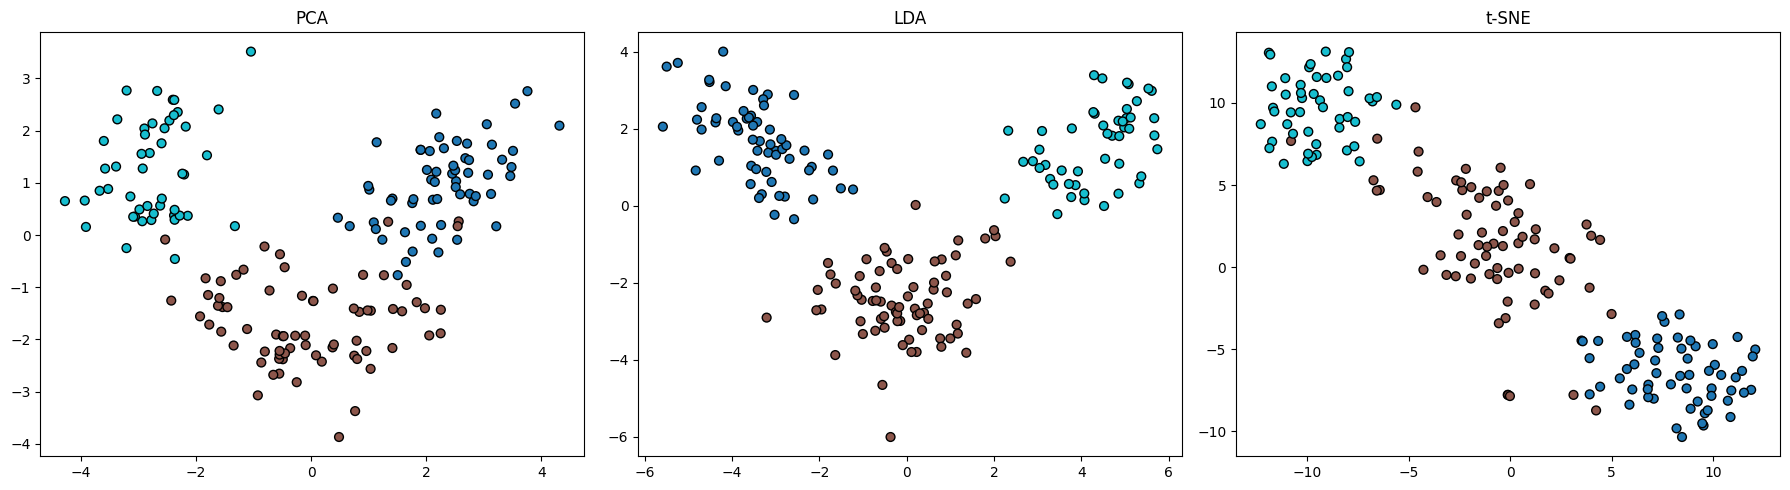

In [409]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE


data = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)


plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', edgecolor='k', s=40)
plt.title("PCA")

plt.subplot(1, 3, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='tab10', edgecolor='k', s=40)
plt.title("LDA")

plt.subplot(1, 3, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', edgecolor='k', s=40)
plt.title("t-SNE")

plt.tight_layout()
plt.show()


### 8. Исследуйте влияние аргумента perplexity на результат работы алгоритма на многомерных данных.


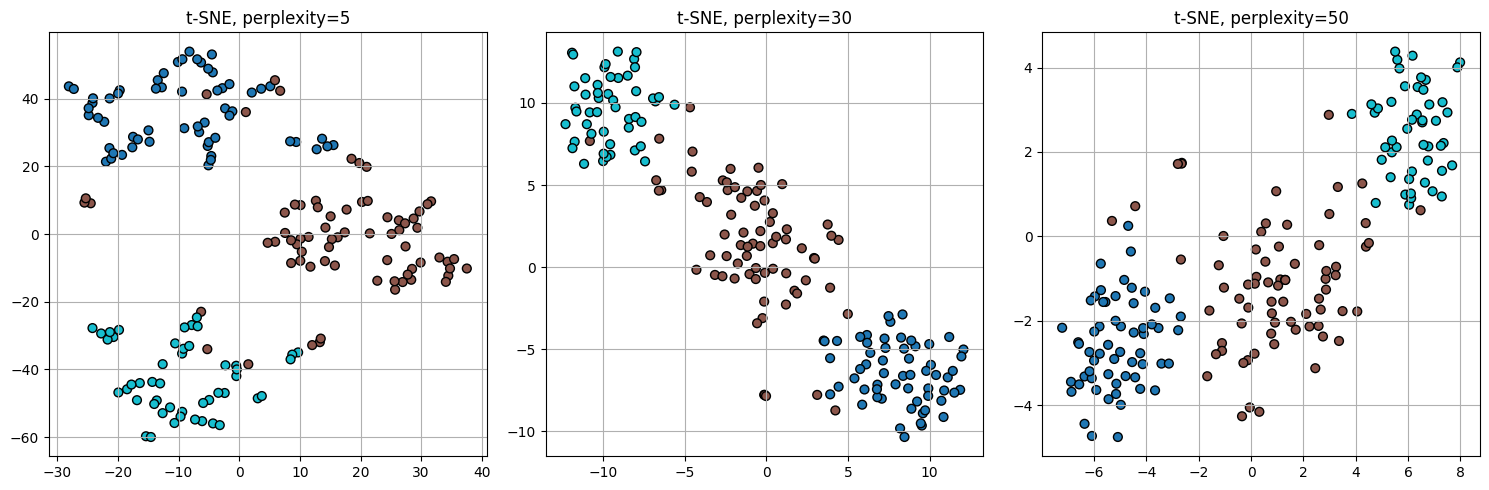

In [410]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=1, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


perplexity_values = [5, 30, 50]
plt.figure(figsize=(15, 5))

for i, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', edgecolor='k', s=40)
    plt.title(f't-SNE, perplexity={perplexity}')
    plt.grid(True)

plt.tight_layout()
plt.show()

### 9. Визуализируйте выбранный датасет при помощи разных методов понижения размерности.


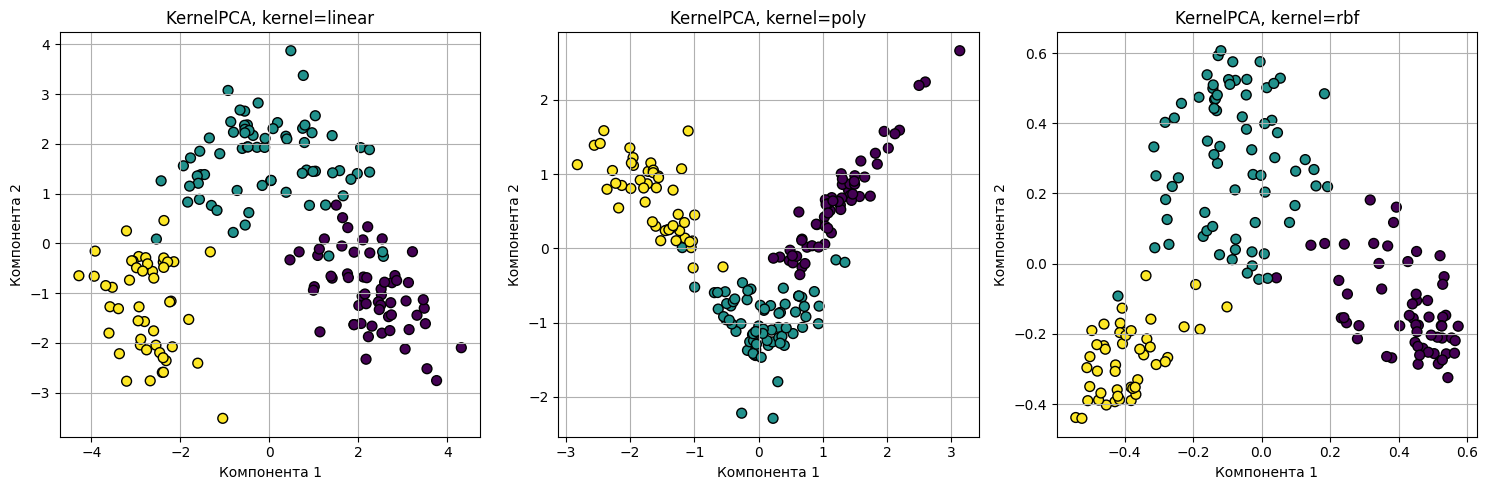

In [411]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

data = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(15, 5))
kernels = ['linear', 'poly', 'rbf']
for i, kernel in enumerate(kernels):
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=0.1 if kernel == 'rbf' else None)
    X_kpca = kpca.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f'KernelPCA, kernel={kernel}')
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')
    plt.grid(True)

plt.tight_layout()
plt.show()

### 10. Сравните все три алгоритма классификации по метрике доли объясненной дисперсии. Выберите для каждого метода оптимальное количество кластеров по методу локтя.


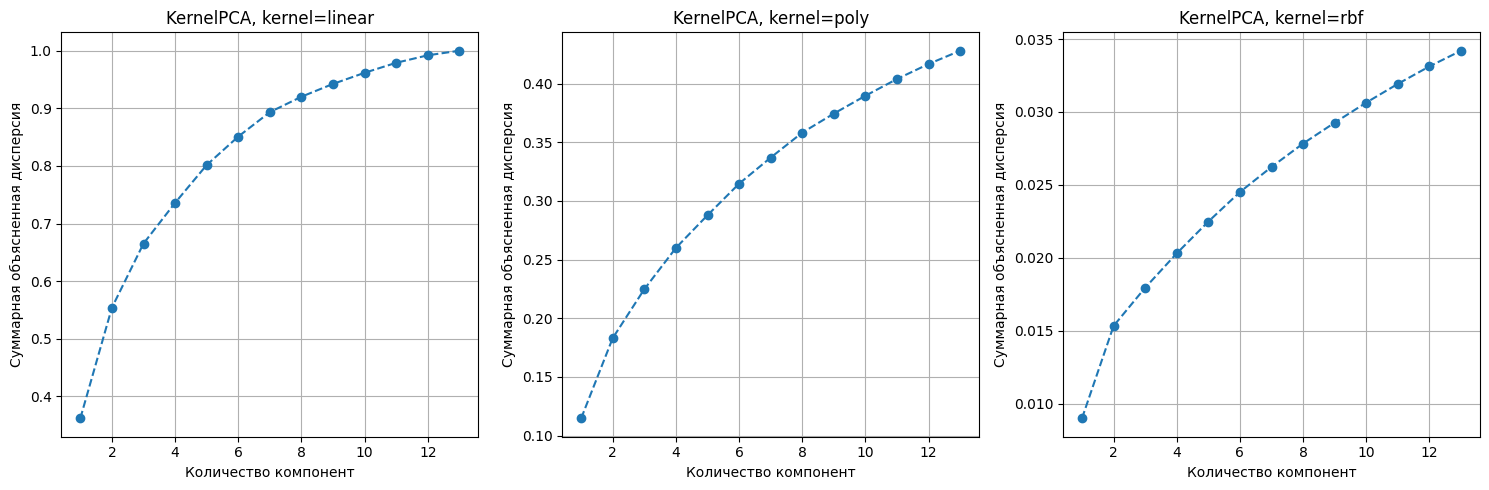

In [412]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

data = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(15, 5))
kernels = ['linear', 'poly', 'rbf']
n_components_range = range(1, 14)

for i, kernel in enumerate(kernels):
    explained_variance = []
    
    for n in n_components_range:
        kpca = KernelPCA(n_components=n, kernel=kernel, gamma=0.1 if kernel == 'rbf' else None)
        X_kpca = kpca.fit_transform(X_scaled)

        total_variance = np.var(X_scaled, axis=0).sum()
        explained_variance.append(np.var(X_kpca, axis=0).sum() / total_variance)

    plt.subplot(1, 3, i+1)
    plt.plot(n_components_range, explained_variance, marker='o', linestyle='--')
    plt.xlabel('Количество компонент')
    plt.ylabel('Суммарная объясненная дисперсия')
    plt.title(f'KernelPCA, kernel={kernel}')
    plt.grid(True)

plt.tight_layout()
plt.show()

### 11. Повторите измерение метрики, но уже после разбиения выборки на тестовую и обучающую. Сравните долю объясненной дисперсии на тестовой выборке.

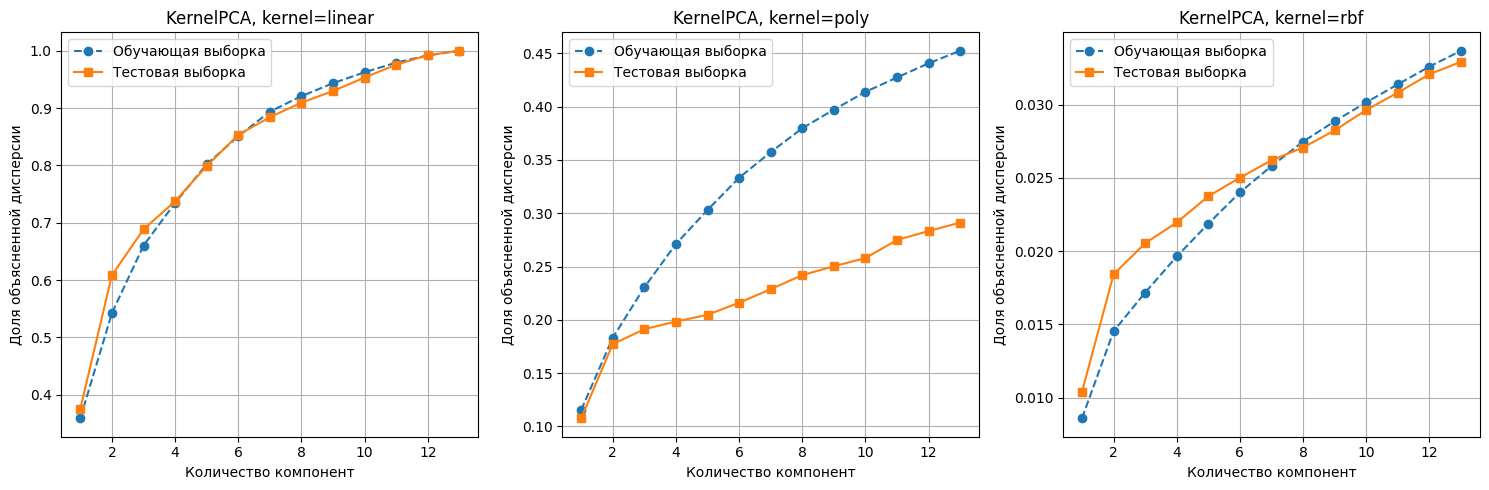

In [413]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split

data = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

plt.figure(figsize=(15, 5))
kernels = ['linear', 'poly', 'rbf']
n_components_range = range(1, 14)

for i, kernel in enumerate(kernels):
    explained_variance_ratio_train = []
    explained_variance_ratio_test = []

    for n in n_components_range:
        kpca = KernelPCA(n_components=n, kernel=kernel, gamma=0.1 if kernel == 'rbf' else None)
        X_train_kpca = kpca.fit_transform(X_train)
        
        X_test_kpca = kpca.transform(X_test)
        
        total_variance_train = np.var(X_train, axis=0).sum()
        explained_variance_ratio_train.append(np.var(X_train_kpca, axis=0).sum() / total_variance_train)

        total_variance_test = np.var(X_test, axis=0).sum()
        explained_variance_ratio_test.append(np.var(X_test_kpca, axis=0).sum() / total_variance_test)

    plt.subplot(1, 3, i+1)
    plt.plot(n_components_range, explained_variance_ratio_train, marker='o', linestyle='--', label='Обучающая выборка')
    plt.plot(n_components_range, explained_variance_ratio_test, marker='s', linestyle='-', label='Тестовая выборка')
    plt.xlabel('Количество компонент')
    plt.ylabel('Доля объясненной дисперсии')
    plt.title(f'KernelPCA, kernel={kernel}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


# Контрольные вопросы

**В чем состоит задача понижения размерности? В каких случаях следует понижать размерность датасета?**

Задача понижения размерности заключается в уменьшении числа признаков, сохраняя при этом как можно больше важной информации. Это полезно для упрощения модели, улучшения визуализации и борьбы с проблемами переобучения в случае большого числа признаков.

**В чем существенное различие изученных трех методов понижения размерности: PCA, LDA, t-SNE? В каких случаях какие следует применять?**

PCA (Principal Component Analysis) ищет линейные компоненты для сохранения дисперсии и подходит для уменьшения размерности без учета меток классов. LDA (Linear Discriminant Analysis) направлен на максимизацию различий между классами и используется для классификации. t-SNE (t-Distributed Stochastic Neighbor Embedding) сохраняет локальную структуру и хорошо подходит для визуализации данных с высокой размерностью.

**Что такое главная компонента? Какой предметный смысл она несет?**

Главная компонента — это линейная комбинация исходных признаков, направленная в сторону максимальной дисперсии данных. Она помогает упростить восприятие и анализ данных, выделяя наиболее важные направления изменений.

**В чем состоит компромисс при выборе количества компонент? Как работает для этой задачи метод локтя?**

Компромисс заключается в балансе между уменьшением размерности и сохранением информации. Метод локтя помогает выбрать оптимальное количество компонент, анализируя график объясненной дисперсии и определяя точку, где увеличение числа компонент дает минимальное улучшение.

**Какой смысл и механизм действия у аргумента perplexity в методе понижения размерности t-SNE?** 

Perplexity в t-SNE регулирует баланс между локальной и глобальной структурой данных. Меньшее значение делает акцент на локальных связях, а большее — на глобальной структуре, влияя на то, как точки группируются в процессе снижения размерности.
